*May need to install xlrd to run. To do this, add a code block, paste and run
``pip install xlrd``

## Create DataFrame from dataset 

In [2]:
#excel spreadsheet in database form
import matplotlib.pyplot
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Download the file and read it into a dataframe
readfile = pd.read_excel('ConcreteData.xls')
# print the contents of readfilecsv
df = pd.DataFrame (readfile)
# Reading a .csv file
#giving the dotofile columns meaningful names for our database
df.columns = ['Cement','BlastFurnaceSlag','FlyAsh','water','superplasticizer','coarseaggregate','FineAggregate','age','CC_Strength']
df.head ()

,Cement,BlastFurnaceSlag,FlyAsh,water,superplasticizer,coarseaggregate,FineAggregate,age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Perform linear regression modeling from data set

In [3]:
from sklearn import linear_model
import statsmodels.api as sm
# Implementing Possible data Model Structures
#Example 1) Linear
x = df[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'water', 'superplasticizer', 'coarseaggregate', 'FineAggregate', 'age' ]]
y = df['CC_Strength' ]
# with slearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
print ('Intercept: \n', regr. intercept_)
print ('Coefficients:\n', regr.coef_)
# prediction with sklearn
# with statsmodels
x = sm. add_constant (x) # adding a constant
#Ordinary Least squares( determines line of best fit)
model= sm.OLS(y, x) .fit ()
predictions = model.predict (x)
print_model = model. summary ()
print (print_model)

Intercept: 
 -23.16375581107919
Coefficients:
 [ 0.11978526  0.10384725  0.08794308 -0.1502979   0.29068694  0.01803018
  0.02015446  0.11422562]
                            OLS Regression Results                            
Dep. Variable:            CC_Strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.76e-206
Time:                        18:59:46   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|    

## Split dataset into training and testing sets

In [4]:
# Import Libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = df

# select all rows and all columns except the last one
x= data.iloc[:,:-1]
# select all rows and all columns
y = data.iloc[:]

# Train-Test Split(read more below)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

^  typical setup for preparing data for a machine learning model, where features (x) and the target variable (y) are selected, and the dataset is split into training and testing sets

## Create DF and DF Subsets

In [5]:
# Create DataFrame
d = {'Cement':[175.0,320.0,320.0,320.0,530.0],'BlastFurnaceSlag':[13.0,0.0,0.0,73.0,359.0],'FlyAsh':[172.0,0.0,126.0,54.0,200.0],'coarseaggregate':[1000.0,970.0,860.0,972.0,1145.0],'FineAggregate':[856.0,850.0,856.0,773.0,992.0],'water':[156.0,192.0,209.0,181.0,247.0],'superplasticizer':[4.0,0.0,5.7,6.0,32.0],'age':[3.0,7.0,28.0,45.0,365.0]}
df = pd.DataFrame(data=d)

#df.head()

# Check for missing values
df.isna().sum()

# Create DataFrame Subsets
df_0= df.iloc[0:1:]
df_1= df.iloc[1:2:]
df_2= df.iloc[2:3:]
df_3= df.iloc[3:4:]
df_4= df.iloc[4:5:]

# display the first few rows of DataFrame subset df_0
df_0.head()

,Cement,BlastFurnaceSlag,FlyAsh,coarseaggregate,FineAggregate,water,superplasticizer,age
0,175.0,13.0,172.0,1000.0,856.0,156.0,4.0,3.0


In [6]:
df.isna().sum() #check for missing values in parent DataFrame

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
coarseaggregate     0
FineAggregate       0
water               0
superplasticizer    0
age                 0
dtype: int64

# Model/DataFrame 0

## Run RFR Model 0 then evaluate and show its predictions against actual data

model				 RMSE 		 MSE 		 MAE 		 R2
RandomForestRegressor 	 9.46 		 89.55 		 4.63 		 0.93


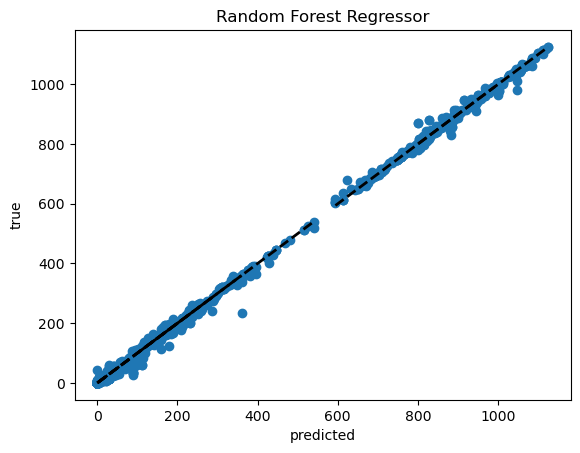

In [7]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model with 100 estimators
rfr0 = RandomForestRegressor(n_estimators=100)

# Train the model on the training data
rfr0.fit(x_train, y_train)

# Use the trained model to predict y values for the test set
y_pred_rfr0 = rfr0.predict(x_test)

# Print evaluation metrics for the model
print("model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""RandomForestRegressor \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_rfr0)), mean_squared_error(y_test, y_pred_rfr0),
    mean_absolute_error(y_test, y_pred_rfr0), r2_score(y_test, y_pred_rfr0)))

# Create a scatter plot comparing true and predicted values
plt.scatter(y_test, y_pred_rfr0)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("Random Forest Regressor")

# Display the plot
plt.show()

## OLS Model for df_0

In [8]:
# Feature and Target Selection
x1 = df_0[['BlastFurnaceSlag','Cement','FlyAsh','coarseaggregate','FineAggregate','water','superplasticizer','age']]
y1 = df_0['Cement']

# Linear Regression Model
regr = linear_model.LinearRegression()
regr.fit(x1,y1)

# Print Intercept and Coefficients
print('Intercept" \n',regr.intercept_)
print('Coefficiens: \n', regr.coef_)

# Prediction
new_water = 2.75
new_age = 5.3
x= sm.add_constant(x1)

# Ordinary Least Squares (OLS) Model
model0 = sm.OLS(y1,x1).fit()
print(print_model)

Intercept" 
 175.0
Coefficiens: 
 [0. 0. 0. 0. 0. 0. 0. 0.]
                            OLS Regression Results                            
Dep. Variable:            CC_Strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.76e-206
Time:                        18:59:46   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

# Model relationship between input features and concrete compressive strength using 3 functions

In [9]:
# Extract relevant columns from the DataFram
Cement = df_0['Cement']
BlastFurnaceSlag = df_0['BlastFurnaceSlag']
FlyAsh = df_0['FlyAsh']
coarseaggregate = df_0['coarseaggregate']
FineAggregate = df_0['FineAggregate']
water = df_0['water']
superplasticizer = df_0['superplasticizer']
age = df_0['age']

# Set Coefficients
b0=175.0
b1=0.0013
b2=0.0166
b3=0.0963
b4=0.0824
b5=0.0150
b6=0.0004
b7=0.0003
e1=b1
e2=b2
e3=b3
e4=b4
e5=b5
e6=b6
e7=b7

# Import libs for calculations
import numpy
import math

# Calculation of Concrete Strength:
# Calculates compressive strength using a linear combination of coefficients and input features.
CC_strength_df0 = b0+(b1*BlastFurnaceSlag)+(b2*FlyAsh)+(b3*coarseaggregate)+(b4*FineAggregate)+(b5*water)+(b6*superplasticizer)+(b7*age)

# Calculation of Logarithmic Strength:
log_strength_df0 = numpy.log(b0+b1*BlastFurnaceSlag+b2*FlyAsh+b3*coarseaggregate+b4*FineAggregate+b5*water+b6*superplasticizer+b7*age)

# Calculation of Power Strength:
power_strength_df0 = b0 * (BlastFurnaceSlag**e1*FlyAsh**e2*coarseaggregate**e3*FineAggregate**e4*water**e5*superplasticizer**e6*age**e7)


print(CC_strength_df0,log_strength_df0,power_strength_df0)

0    347.049
dtype: float64 0    5.849466
dtype: float64 0    700.507218
dtype: float64


In [10]:
#df_1.head() #display the first few rows of the DataFrame

# Dataframe/Model 1
* No comments because its exactly the same as the code for df0, just with df2 values 

## Run RFR then evaluate and show its predictions against actual data

model				 RMSE 		 MSE 		 MAE 		 R2
RandomForestRegressor 	 9.69 		 93.89 		 4.77 		 0.93


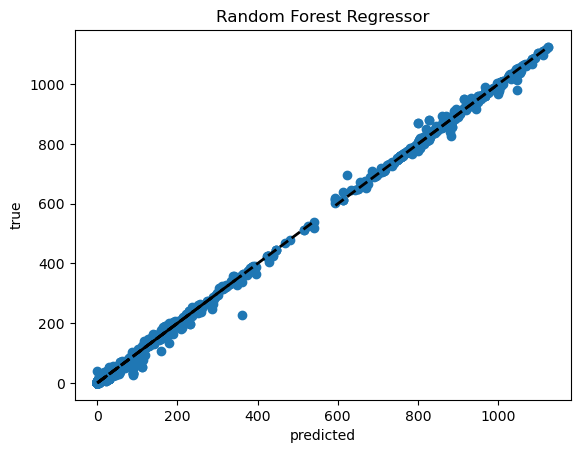

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfr1 = RandomForestRegressor(n_estimators=100)
rfr1.fit(x_train, y_train)
y_pred_rfr1 = rfr1.predict(x_test)
print("model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""RandomForestRegressor \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_rfr1)),mean_squared_error(y_test,y_pred_rfr1),
    mean_absolute_error(y_test,y_pred_rfr1),r2_score(y_test, y_pred_rfr1)))

plt.scatter(y_test,y_pred_rfr1)
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], 'k--',lw = 2)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("Random Forest Regressor")
plt.show()

## OLS Model

In [12]:
x1 = df_1[['BlastFurnaceSlag','Cement','FlyAsh','coarseaggregate','FineAggregate','water','superplasticizer','age']]
y1 = df_1['Cement']

regr = linear_model.LinearRegression()
regr.fit(x1,y1)

print('Intercept" \n',regr.intercept_)
print('Coefficiens: \n', regr.coef_)

new_water = 2.75
new_age = 5.3
x= sm.add_constant(x1)

model = sm.OLS(y1,x1).fit()
print(print_model)

Intercept" 
 320.0
Coefficiens: 
 [0. 0. 0. 0. 0. 0. 0. 0.]
                            OLS Regression Results                            
Dep. Variable:            CC_Strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.76e-206
Time:                        18:59:46   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

# Model relationship between input features and concrete compressive strength using 3 functions

In [13]:
# Extract relevant columns from the DataFrame
Cement = df_1['Cement']
BlastFurnaceSlag = df_1['BlastFurnaceSlag']
FlyAsh = df_1['FlyAsh']
coarseaggregate = df_1['coarseaggregate']
FineAggregate = df_1['FineAggregate']
water = df_1['water']
superplasticizer = df_1['superplasticizer']
age = df_1['age']

#Coefficient Initialization
b0=320.0
b1=0
b2=0
b3=0.1722
b4=0.1509
b5=0.0341
b6=0
b7=0.0012
e1=b1
e2=b2
e3=b3
e4=b4
e5=b5
e6=b6
e7=b7

import numpy
import math

CC_strength_df1 = b0+(b1*BlastFurnaceSlag)+(b2*FlyAsh)+(b3*coarseaggregate)+(b4*FineAggregate)+(b5*water)+(b6*superplasticizer)+(b7*age)

log_strength_df1 = numpy.log(b0+b1*BlastFurnaceSlag+b2*FlyAsh+b3*coarseaggregate+b4*FineAggregate+b5*water+b6*superplasticizer+b7*age)

power_strength_df1 = b0 * (BlastFurnaceSlag**e1*FlyAsh**e2*coarseaggregate**e3*FineAggregate**e4*water**e5*superplasticizer**e6*age**e7)

print(CC_strength_df1, log_strength_df1, power_strength_df1)

1    621.8546
dtype: float64 1    6.432706
dtype: float64 1    3470.532186
dtype: float64


# Model/DataFrame 2

## Run RFR then evaluate and show its predictions against actual data

model				 RMSE 		 MSE 		 MAE 		 R2
RandomForestRegressor 	 9.69 		 93.89 		 4.77 		 0.93


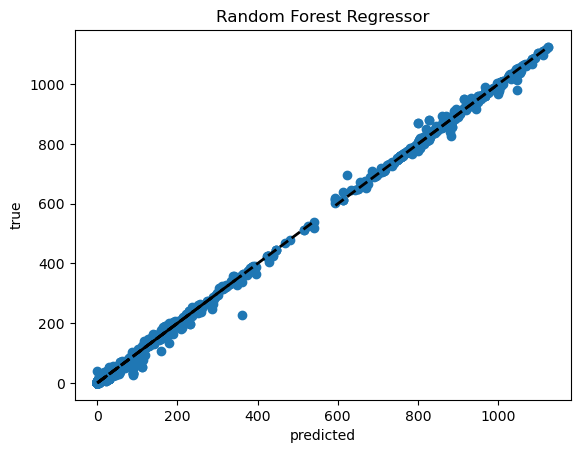

In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr2 = RandomForestRegressor(n_estimators=100)
rfr2.fit(x_train, y_train)
y_pred_rfr2 = rfr1.predict(x_test)
print("model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""RandomForestRegressor \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_rfr2)),mean_squared_error(y_test,y_pred_rfr2),
    mean_absolute_error(y_test,y_pred_rfr2),r2_score(y_test, y_pred_rfr2)))

plt.scatter(y_test,y_pred_rfr2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], 'k--',lw = 2)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("Random Forest Regressor")
plt.show()

## OLS Model

In [15]:
x1 = df_2[['BlastFurnaceSlag','Cement','FlyAsh','coarseaggregate','FineAggregate','water','superplasticizer','age']]
y1 = df_2['Cement']

regr = linear_model.LinearRegression()
regr.fit(x1,y1)

print('Intercept" \n',regr.intercept_)
print('Coefficiens: \n', regr.coef_)

new_water = 2.75
new_age = 5.3
x= sm.add_constant(x1)

model0 = sm.OLS(y1,x1).fit()
print(print_model)

Intercept" 
 320.0
Coefficiens: 
 [0. 0. 0. 0. 0. 0. 0. 0.]
                            OLS Regression Results                            
Dep. Variable:            CC_Strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.76e-206
Time:                        18:59:46   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## Model relationship between input features and concrete compressive strength using 3 functions 

In [16]:
Cement = df_2['Cement']
BlastFurnaceSlag = df_2['BlastFurnaceSlag']
FlyAsh = df_2['FlyAsh']
coarseaggregate = df_2['coarseaggregate']
FineAggregate = df_2['FineAggregate']
water = df_2['water']
superplasticizer = df_2['superplasticizer']
age = df_2['age']

b0=175.0
b1=0.0013
b2=0.0166
b3=0.0963
b4=0.0824
b5=0.0150
b6=0.0004
b7=0.0003
e1=b1
e2=b2
e3=b3
e4=b4
e5=b5
e6=b6
e7=b7

#Calculations
import numpy
import math

CC_strength_df2 = b0+(b1*BlastFurnaceSlag)+(b2*FlyAsh)+(b3*coarseaggregate)+(b4*FineAggregate)+(b5*water)+(b6*superplasticizer)+(b7*age)

log_strength_df2 = numpy.log(b0+b1*BlastFurnaceSlag+b2*FlyAsh+b3*coarseaggregate+b4*FineAggregate+b5*water+b6*superplasticizer+b7*age)

power_strength_df2 = b0 * (BlastFurnaceSlag**e1*FlyAsh**e2*coarseaggregate**e3*FineAggregate**e4*water**e5*superplasticizer**e6*age**e7)

print(CC_strength_df2,log_strength_df2,power_strength_df2)

2    333.58968
dtype: float64 2    5.809912
dtype: float64 2    0.0
dtype: float64


# Model 3

In [17]:
df_3.head()

,Cement,BlastFurnaceSlag,FlyAsh,coarseaggregate,FineAggregate,water,superplasticizer,age
3,320.0,73.0,54.0,972.0,773.0,181.0,6.0,45.0


## Run RFR then evaluate and show its predictions against actual data


model				 RMSE 		 MSE 		 MAE 		 R2
RandomForestRegressor 	 9.59 		 91.89 		 4.70 		 0.93


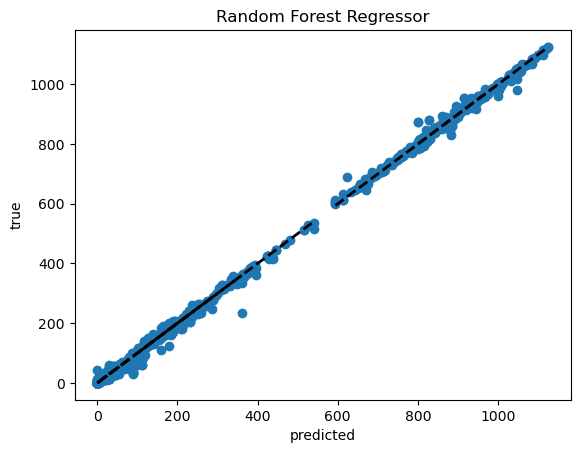

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr3 = RandomForestRegressor(n_estimators=100)
rfr3.fit(x_train, y_train)
y_pred_rfr3 = rfr3.predict(x_test)
print("model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""RandomForestRegressor \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_rfr3)),mean_squared_error(y_test,y_pred_rfr3),
    mean_absolute_error(y_test,y_pred_rfr3),r2_score(y_test, y_pred_rfr3)))

plt.scatter(y_test,y_pred_rfr3)
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], 'k--',lw = 2)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("Random Forest Regressor")
plt.show()

## OLS Model

In [19]:
x1 = df_3[['BlastFurnaceSlag','Cement','FlyAsh','coarseaggregate','FineAggregate','water','superplasticizer','age']]
y1 = df_3['Cement']

regr = linear_model.LinearRegression()
regr.fit(x1,y1)

print('Intercept" \n',regr.intercept_)
print('Coefficiens: \n', regr.coef_)

new_water = 2.75
new_age = 5.3
#print('predicted cement: \n', regr.predict([['Cement','BlastFurnaceSlag','FlyAsh','water','superplasticizer','coarseaggregate','FineAggregate','age']])
x= sm.add_constant(x1)

model0 = sm.OLS(y1,x1).fit()
#predictions = model0.summary()
#print_model = model0. summary ()
print(print_model)

Intercept" 
 320.0
Coefficiens: 
 [0. 0. 0. 0. 0. 0. 0. 0.]
                            OLS Regression Results                            
Dep. Variable:            CC_Strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.76e-206
Time:                        18:59:46   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## Model relationship between input features and concrete compressive strength using 3 functions 

In [30]:
Cement = df_3['Cement']
BlastFurnaceSlag = df_3['BlastFurnaceSlag']
FlyAsh = df_3['FlyAsh']
coarseaggregate = df_3['coarseaggregate']
FineAggregate = df_3['FineAggregate']
water = df_3['water']
superplasticizer = df_3['superplasticizer']
age = df_3['age']

b0=175.0
b1=0.0013
b2=0.0166
b3=0.0963
b4=0.0824
b5=0.0150
b6=0.0004
b7=0.0003
e1=b1
e2=b2
e3=b3
e4=b4
e5=b5
e6=b6
e7=b7

# Calculations 
import numpy
import math

CC_strength_df3 = b0+(b1*BlastFurnaceSlag)+(b2*FlyAsh)+(b3*coarseaggregate)+(b4*FineAggregate)+(b5*water)+(b6*superplasticizer)+(b7*age)

log_strength_df3 = numpy.log(b0+b1*BlastFurnaceSlag+b2*FlyAsh+b3*coarseaggregate+b4*FineAggregate+b5*water+b6*superplasticizer+b7*age)

power_strength_df3 = b0 * (BlastFurnaceSlag**e1*FlyAsh**e2*coarseaggregate**e3*FineAggregate**e4*water**e5*superplasticizer**e6*age**e7)

print(CC_strength_df3,log_strength_df3,power_strength_df3)

3    336.021
dtype: float64 3    5.817174
dtype: float64 3    683.264346
dtype: float64


# Model 4

In [22]:
df_4.head()

,Cement,BlastFurnaceSlag,FlyAsh,coarseaggregate,FineAggregate,water,superplasticizer,age
4,530.0,359.0,200.0,1145.0,992.0,247.0,32.0,365.0


## Run RFR then evaluate and show its predictions against actual data

model				 RMSE 		 MSE 		 MAE 		 R2
RandomForestRegressor 	 9.67 		 93.57 		 4.76 		 0.93


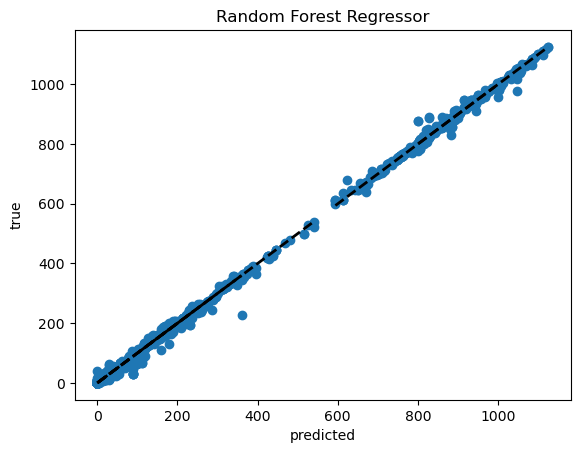

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr4 = RandomForestRegressor(n_estimators=100)
rfr4.fit(x_train, y_train)
y_pred_rfr4 = rfr4.predict(x_test)
print("model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""RandomForestRegressor \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_rfr4)),mean_squared_error(y_test,y_pred_rfr4),
    mean_absolute_error(y_test,y_pred_rfr4),r2_score(y_test, y_pred_rfr4)))

plt.scatter(y_test,y_pred_rfr4)
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], 'k--',lw = 2)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("Random Forest Regressor")
plt.show()

## OLS Model

In [24]:
x1 = df_4[['BlastFurnaceSlag','Cement','FlyAsh','coarseaggregate','FineAggregate','water','superplasticizer','age']]
y1 = df_4['Cement']

regr = linear_model.LinearRegression()
regr.fit(x1,y1)

print('Intercept" \n',regr.intercept_)
print('Coefficiens: \n', regr.coef_)

new_water = 2.75
new_age = 5.3
x= sm.add_constant(x1)

model0 = sm.OLS(y1,x1).fit()
print(print_model)

Intercept" 
 530.0
Coefficiens: 
 [0. 0. 0. 0. 0. 0. 0. 0.]
                            OLS Regression Results                            
Dep. Variable:            CC_Strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.76e-206
Time:                        18:59:46   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## Model relationship between input features and concrete compressive strength using 3 functions 

In [32]:
Cement = df_4['Cement']
BlastFurnaceSlag = df_4['BlastFurnaceSlag']
FlyAsh = df_4['FlyAsh']
coarseaggregate = df_4['coarseaggregate']
FineAggregate = df_4['FineAggregate']
water = df_4['water']
superplasticizer = df_4['superplasticizer']
age = df_4['age']

b0=175.0
b1=0.0013
b2=0.0166
b3=0.0963
b4=0.0824
b5=0.0150
b6=0.0004
b7=0.0003
e1=b1
e2=b2
e3=b3
e4=b4
e5=b5
e6=b6
e7=b7

import numpy
import math

CC_strength_df4 = b0+(b1*BlastFurnaceSlag)+(b2*FlyAsh)+(b3*coarseaggregate)+(b4*FineAggregate)+(b5*water)+(b6*superplasticizer)+(b7*age)

log_strength_df4 = numpy.log(b0+b1*BlastFurnaceSlag+b2*FlyAsh+b3*coarseaggregate+b4*FineAggregate+b5*water+b6*superplasticizer+b7*age)

power_strength_df4 = b0 * (BlastFurnaceSlag**e1*FlyAsh**e2*coarseaggregate**e3*FineAggregate**e4*water**e5*superplasticizer**e6*age**e7)

print(CC_strength_df4,log_strength_df4,power_strength_df4)

4    374.6183
dtype: float64 4    5.925908
dtype: float64 4    729.950653
dtype: float64


# Summary
## Root mean square deviation chart(between models 0-4)

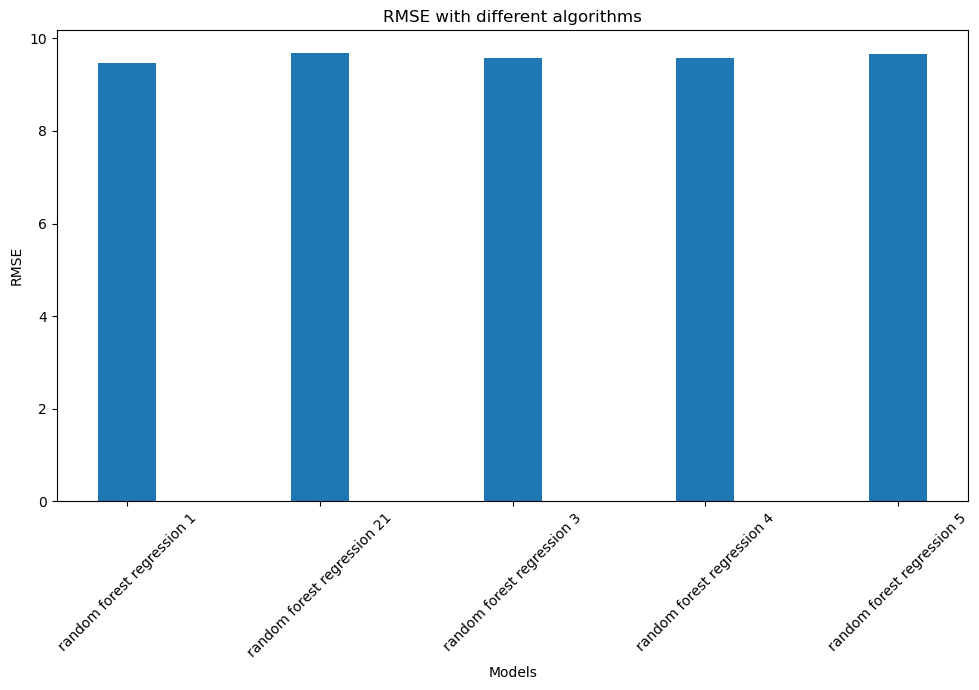

In [27]:
models = [rfr0,rfr1,rfr2,rfr3,rfr4]
names = ["random forest regression 1","random forest regression 2","random forest regression 3","random forest regression 4","random forest regression 5"]
rmses = []
for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
    
x = np.arange(len(names))
width = 0.3

fig, ax = plt.subplots(figsize = (10,7))
rects = ax.bar(x, rmses,width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with different algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 45)
fig.tight_layout()
plt.show()

# Strength Results through 3 different formulas


In [28]:
print("the linear equation projected concrete strength for 5 possible mixtures is:", 
      CC_strength_df0, CC_strength_df1, CC_strength_df2, CC_strength_df3, CC_strength_df4)
print("the logression equation projected concrete strength for 5 possible mixtures is", 
      log_strength_df0,log_strength_df1,log_strength_df2,log_strength_df3,log_strength_df4)
print("the power law equation projected concrete strength for 5 possible mixtures is", 
      power_strength_df0,power_strength_df1,power_strength_df2,power_strength_df3,power_strength_df4)

the linear equation projected concrete strength for 5 possible mixtures is: 0    347.049
dtype: float64 1    621.8546
dtype: float64 2    333.58968
dtype: float64 3    336.021
dtype: float64 4    374.6183
dtype: float64
the logression equation projected concrete strength for 5 possible mixtures is 0    5.849466
dtype: float64 1    6.432706
dtype: float64 2    5.809912
dtype: float64 3    5.817174
dtype: float64 4    5.925908
dtype: float64
the power law equation projected concrete strength for 5 possible mixtures is 0    700.507218
dtype: float64 1    3470.532186
dtype: float64 2    0.0
dtype: float64 3    683.264346
dtype: float64 4    729.950653
dtype: float64


### Taking all of this information gives us the following overall strength results(rounded to nearest whole number):

- model 0 - 347
- model 1 - 622
- model 2 - 334
- model 3 - 336
- model 4 - 375

therefore, we can assume that concrete mixture 1 has the highest predicted strength.